In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pywt
from Bio import SeqIO
from scipy import signal
from scipy import stats
from scipy.fft import fft
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'pywt'

In [ ]:
import os

All the cancerous genomes were converted to their corresponding EIIP mapping.Statistical operations after performing FFT on the EIIP sequence:
1. Mean
2. Variance
3. Standard Deviation
4. Kurtosis
5. Entropy


In [ ]:
from scipy.fft import fft
def convertMappingToSTFT(array, label):
  '''
    Performs short term fourier transform and returns statistical features such as mean,variance,
    std deviation, skewness,kurtosis 
  '''
  zxx = fft(array)
  # flatten the array
  flat = zxx.flatten()
  psd = [(abs(el)**2)/257  for el in zxx]
  data = [np.mean(psd), np.std(psd),np.var(psd), stats.skew(psd), stats.kurtosis(psd), label]
  return data


In [ ]:
convertMappingToSTFT(y,0)

[0.010344817379244869,
 0.008641067591742232,
 7.466804912505791e-05,
 2.9509333262832045,
 10.205607093035718,
 0]

In [ ]:
import csv
can_data=[]
with open('can_data.csv') as file_obj:
	
	reader_obj = csv.reader(file_obj)	
	for row in reader_obj:
		can_data.append([float(i) for i in row])
# can_data[0]

In [ ]:
import csv
df_non_can=[]
with open('Non_Can_Final.csv') as file_obj:
	
	reader_obj = csv.reader(file_obj)
	
	for row in reader_obj:
		df_non_can.append([float(i) for i in row])

In [ ]:
final=[]
for i in can_data:
  final.append(convertMappingToSTFT(i,1))
  

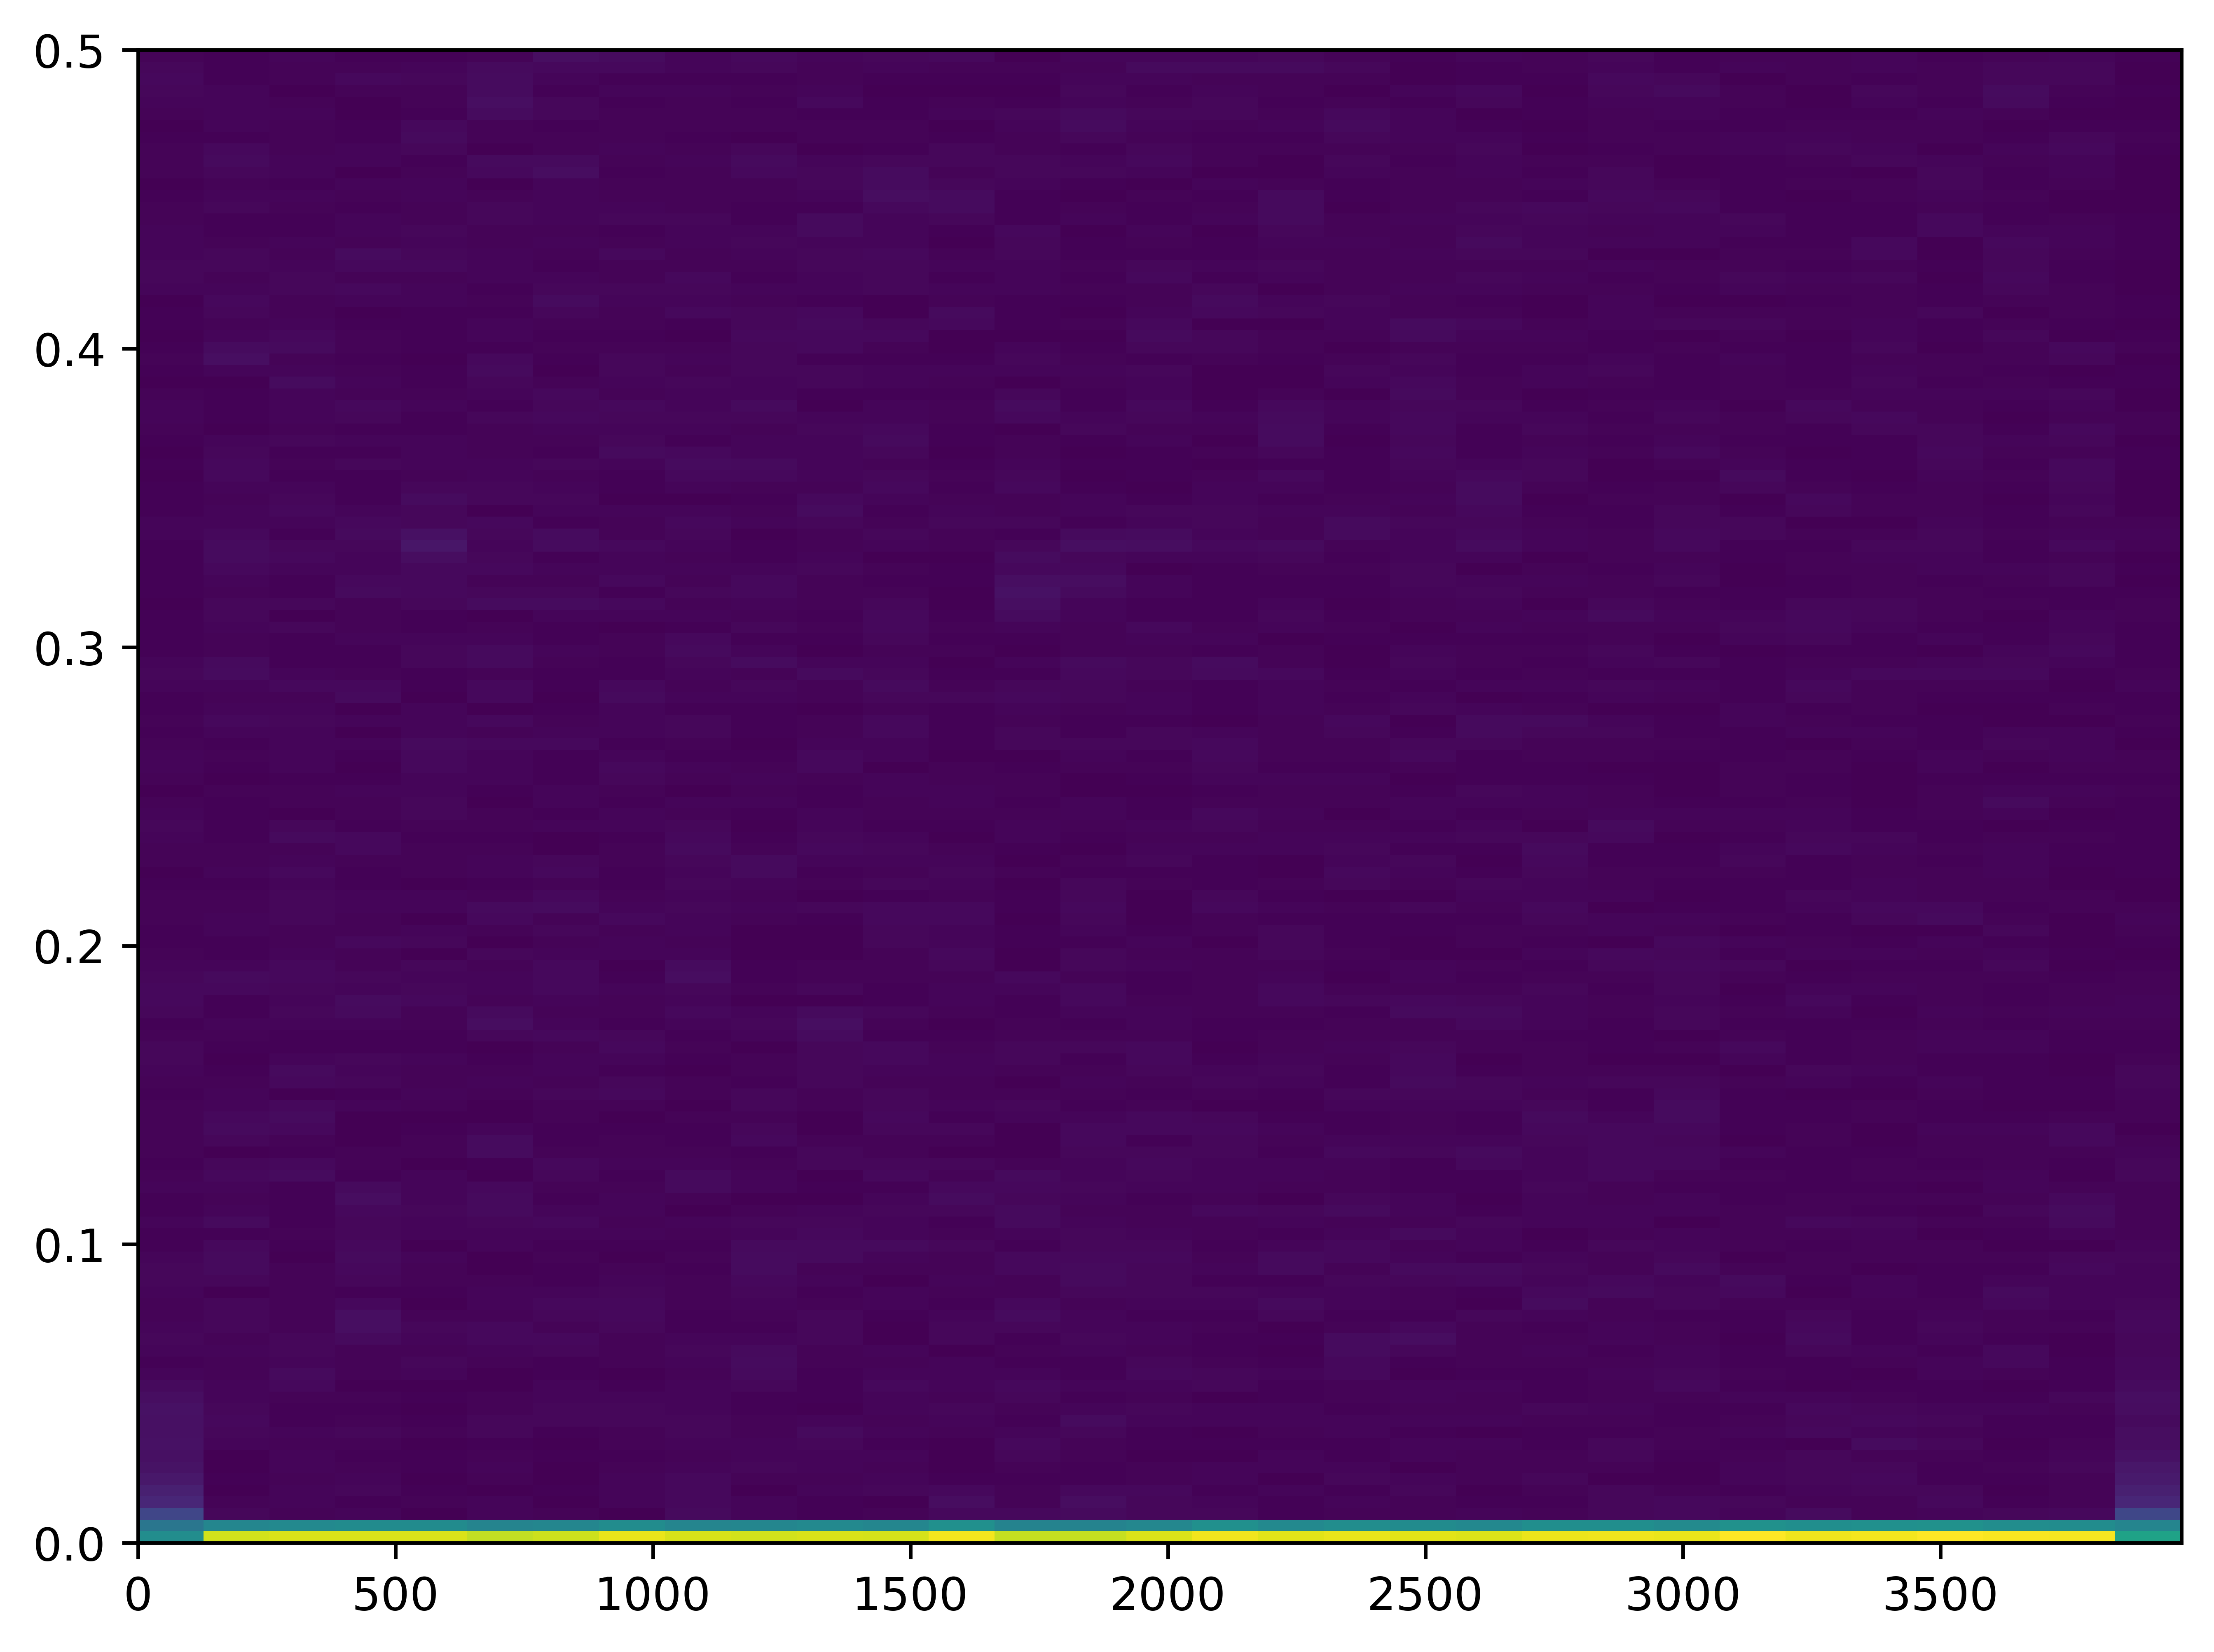

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6), dpi=800)
plt.pcolormesh(t, f, np.abs(zxx))

In [ ]:
for i in df_non_can:
  final.append(convertMappingToSTFT(i,0))

In [ ]:
df = pd.DataFrame(final,columns=['mean', 'std', 'var', 'skew', 'kurtosis', 'label'])


In [ ]:
df

,mean,std,var,skew,kurtosis,label
0,0.130520,6.066337,36.800450,48.197467,2320.997341,1
1,0.160357,8.322677,69.266950,53.898011,2902.997176,1
2,0.604725,60.367485,3644.233293,103.730386,10757.995301,1
3,0.630542,63.404374,4020.114672,103.730394,10757.996417,1
4,0.632369,63.627122,4048.410657,103.730395,10757.996566,1
5,0.626220,62.896644,3955.987817,103.730389,10757.995820,1
6,0.619827,62.202743,3869.181245,103.730396,10757.996783,1
7,0.616010,61.742021,3812.077142,103.730397,10757.996830,1
8,0.622853,62.550515,3912.566963,103.730401,10757.997468,1
9,0.607248,60.721525,3687.103619,103.730392,10757.996232,1


# Building the ML Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [ ]:
model=DecisionTreeClassifier()

In [ ]:
df = df.sample(frac = 1)

# Separating labels and features 

In [ ]:
y=df['label']
X=df.drop('label',axis=1)

# Normalization

In [ ]:
for column in X:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())    
  

In [ ]:
X

,mean,std,var,skew,kurtosis
15,0.307558,0.320664,0.166617,0.320510,0.169054
32,0.303249,0.305929,0.155773,0.303978,0.156729
8,0.793345,0.784016,0.664268,0.780347,0.661613
39,0.360447,0.381131,0.214333,0.377954,0.214670
42,0.344513,0.385299,0.217812,0.379354,0.215449
21,0.389313,0.350093,0.189193,0.356319,0.197199
41,0.351122,0.384433,0.217087,0.379169,0.215346
24,0.315842,0.321469,0.167218,0.320383,0.168884
2,0.852999,0.767481,0.641284,0.777193,0.658683
38,0.401034,0.373890,0.208346,0.378134,0.214771


In [ ]:
y

15    1
32    0
8     1
39    0
42    0
21    0
41    0
24    0
2     1
38    0
4     1
36    0
7     1
11    1
16    1
22    0
19    1
33    0
17    1
26    0
18    1
29    0
5     1
27    0
34    0
40    0
20    1
10    1
0     1
28    0
23    0
6     1
13    1
9     1
31    0
35    0
14    1
3     1
12    1
30    0
43    0
37    0
1     1
25    0
Name: label, dtype: int64

# Splitting the dataset into training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train

,mean,std,var,skew,kurtosis
40,0.215490,0.112506,0.013726,0.378702,0.215284
35,0.217090,0.113266,0.013904,0.378702,0.215284
34,0.212038,0.110514,0.013265,0.378702,0.215284
42,0.217586,0.113738,0.014015,0.378702,0.215284
21,0.190645,0.096154,0.010175,0.357712,0.198136
12,0.023623,0.007242,0.000129,0.071918,0.025560
15,0.166934,0.079964,0.007181,0.320461,0.169212
33,0.213384,0.111196,0.013422,0.378702,0.215284
31,0.088455,0.035057,0.001591,0.208519,0.093891
37,0.212987,0.111031,0.013384,0.378702,0.215284


# Training the model

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
y_pred=model.predict(X_test)

# Results

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.88      0.78      0.82         9

    accuracy                           0.80        15
   macro avg       0.79      0.81      0.80        15
weighted avg       0.81      0.80      0.80        15



In [ ]:
confusion_matrix(y_test,y_pred)

array([[5, 1],
       [2, 7]])

[Text(0.75, 0.9166666666666666, 'X[0] <= 0.368\ngini = 0.485\nsamples = 29\nvalue = [17, 12]'),
 Text(0.625, 0.75, 'X[1] <= 0.088\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(0.5, 0.5833333333333334, 'X[4] <= 0.163\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.375, 0.4166666666666667, 'X[1] <= 0.011\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.25, 0.25, 'X[1] <= 0.006\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.625, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.5833333333333334, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.875, 0.75, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

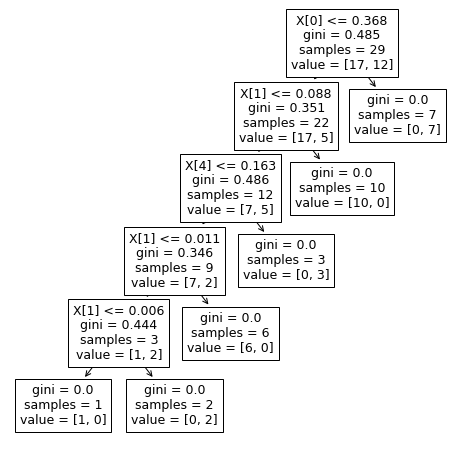

In [ ]:
plt.figure(figsize=(8, 8))
tree.plot_tree(model)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


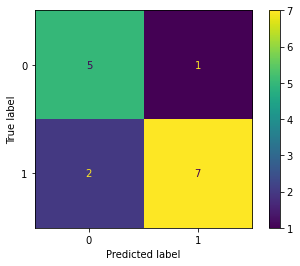

In [ ]:
plot_confusion_matrix(model, X_test, y_test) 

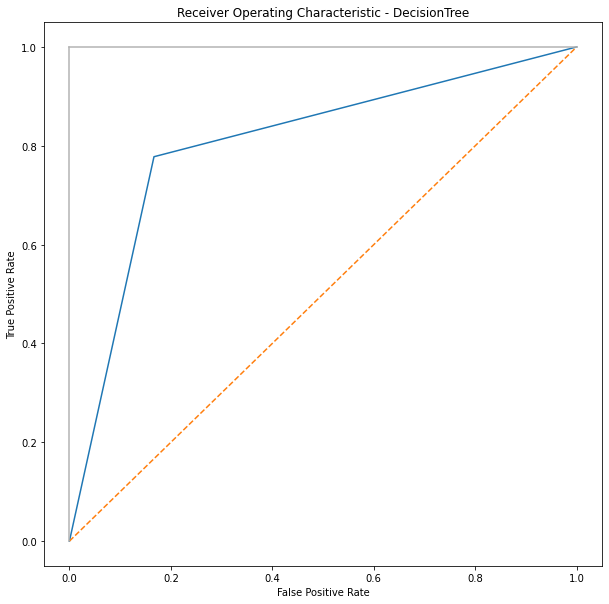

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.7963800904977376

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


error: refname refs/heads/master not found
fatal: Branch rename failed
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Shikhar12233456/cancer_detection.git'
